In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.axes._axes import _log as matplotlib_axes_logger
from mpl_toolkits import mplot3d
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from matplotlib.colors import ListedColormap

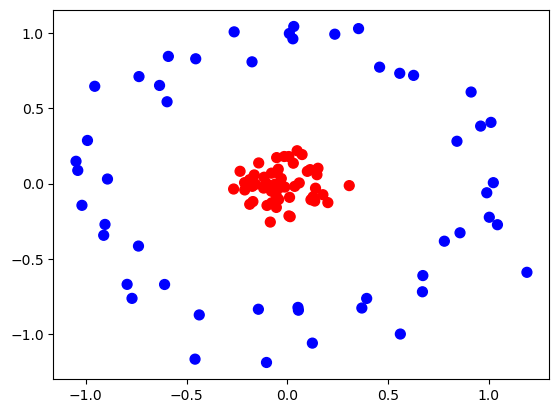

In [15]:
from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='bwr')

# first we will put a simple linear svm and you will see the result will not come good

In [16]:
x_train, y_train, x_test, y_test = train_test_split(x, y , test_size = 0.20)

In [17]:
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)


x_train shape: (80, 2)
y_train shape: (20, 2)


In [19]:

classifier = SVC(kernel="linear")
classifier.fit(X_train, y_train.ravel())
y_pred = classifier.predict(X_test)

In [20]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.6

In [21]:
zero_one_colourmap = ListedColormap(('blue', 'red'))
def plot_decision_boundary(X, y, clf):
    X_set, y_set = X, y
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, 
                                 stop = X_set[:, 0].max() + 1, 
                                 step = 0.01),
                       np.arange(start = X_set[:, 1].min() - 1, 
                                 stop = X_set[:, 1].max() + 1, 
                                 step = 0.01))
  
    plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(), 
                                             X2.ravel()]).T).reshape(X1.shape),
               alpha = 0.75, 
               cmap = zero_one_colourmap)
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = (zero_one_colourmap)(i), label = j)
    plt.title('SVM Decision Boundary')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.legend()
    return plt.show()

C:\Users\BIIT\AppData\Local\Temp\ipykernel_5632\3603277588.py:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


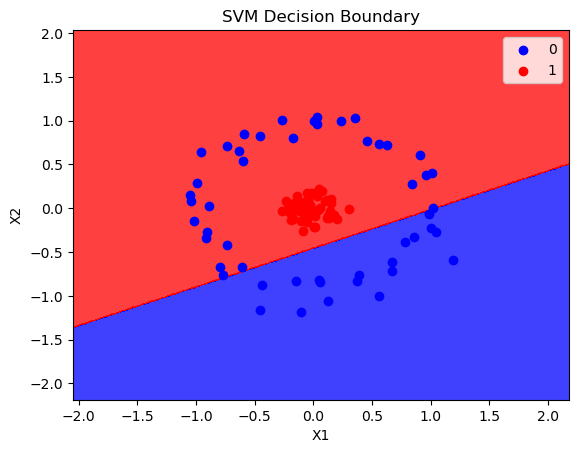

In [22]:
plot_decision_boundary(X, y, classifier)

we apply transformation to  the data to the 3d

<Axes3D: xlabel='X1', ylabel='X2', zlabel='y'>

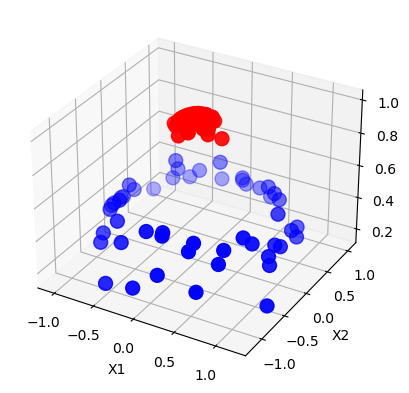

In [23]:
def plot_3d_plot(X, y):
    r = np.exp(-(X ** 2).sum(1))  # this is a radial basis function y = e^ (-x^2)
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=100, cmap='bwr')
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('y')
    return ax
plot_3d_plot(X,y)

as you can see the data is centelised but suppose the data is distributed or they are in multidimention so you cannot appy transpose the data hence to not explicitly appy the transformation we use diffrent kernel or (kernal trick)

In [24]:
rbf_classifier = SVC(kernel="rbf")
rbf_classifier.fit(X_train, y_train)
y_pred = rbf_classifier.predict(X_test)

In [25]:
accuracy_score(y_test, y_pred)

1.0

C:\Users\BIIT\AppData\Local\Temp\ipykernel_5632\3603277588.py:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


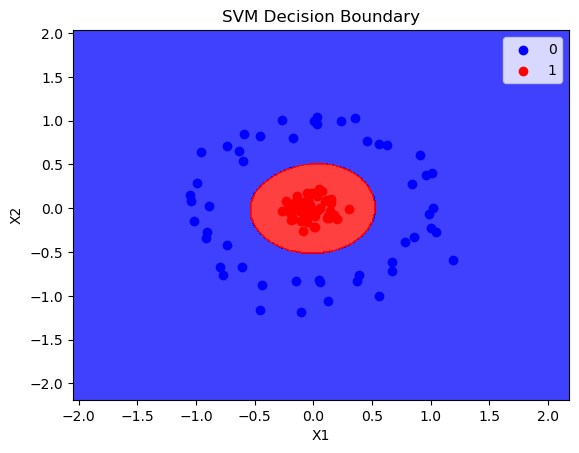

In [26]:
plot_decision_boundary(X, y, rbf_classifier)

In [27]:
poly_classifier = SVC(kernel="poly",degree=2)
poly_classifier.fit(X_train, y_train)
y_pred = poly_classifier.predict(X_test)

In [28]:
accuracy_score(y_test, y_pred)

1.0

C:\Users\BIIT\AppData\Local\Temp\ipykernel_5632\3603277588.py:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


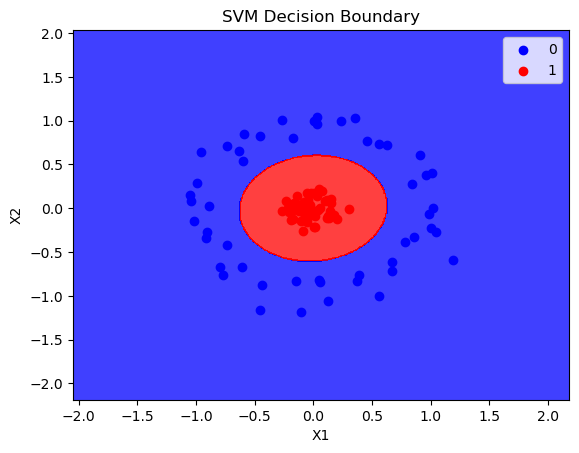

In [30]:
plot_decision_boundary(X, y, poly_classifier)

In [31]:
x

array([[ 3.67801617e-02,  2.11464673e-01],
       [-6.38549313e-01, -8.83953455e-01],
       [ 4.22109745e-02, -1.76526158e-01],
       [-1.24815542e-01, -5.09917414e-02],
       [-9.64484391e-01,  2.90323655e-01],
       [ 9.60302932e-01, -3.62721493e-01],
       [ 8.83055692e-01,  1.30292939e-01],
       [-9.19804676e-01, -4.11002050e-01],
       [ 1.87471724e-01,  2.03675645e-01],
       [ 3.87446734e-01, -8.90056230e-01],
       [-7.68062431e-02, -1.06453677e+00],
       [-1.13278292e+00, -2.45112709e-01],
       [-1.72489434e-02,  7.38951644e-03],
       [-9.53730400e-02,  1.53404004e-01],
       [-7.32326168e-01,  5.19575960e-01],
       [-1.17792060e-01, -7.86337861e-02],
       [-5.85408674e-02,  2.30754851e-02],
       [-5.97309088e-01, -8.56023852e-01],
       [ 2.52168935e-03,  1.79845196e-01],
       [ 1.12162114e-01, -3.18149014e-02],
       [-1.57009363e-01,  1.29661184e-01],
       [ 1.22783447e-01,  1.34098481e-01],
       [-1.01313346e-01,  3.48120647e-03],
       [ 6.

In [32]:
np.exp(-(X**2)).sum(1)


array([1.37141111, 1.32076249, 1.99107924, 1.95460705, 1.1121631 ,
       1.98893742, 1.31124663, 1.0994305 , 1.98358488, 1.98715296,
       1.97574576, 1.18608436, 1.23417642, 1.37015269, 1.97963426,
       1.96906639, 1.37817797, 1.50674277, 1.97514344, 1.20790553,
       1.06056632, 1.95710816, 1.9779095 , 1.96806969, 1.93988654,
       1.41597777, 1.99182711, 1.3971476 , 1.99633503, 1.49106121,
       1.99830535, 1.95598095, 1.9699712 , 1.31815174, 1.98537579,
       1.98906788, 1.97495372, 1.95827113, 1.96825515, 1.96834011,
       1.41631455, 1.44983471, 1.98101772, 1.26284565, 1.19668948,
       1.35135536, 1.9614856 , 1.9549823 , 1.12669716, 1.94449801,
       1.37845162, 1.37122161, 1.99159217, 1.29451527, 1.99930654,
       1.97872806, 1.32364933, 1.42162155, 1.32909348, 1.92980899,
       1.99799134, 1.26510457, 1.96381915, 1.93016194, 1.32477808,
       1.99784013, 1.96798982, 1.36165177, 1.23020554, 0.95026854,
       1.90960079, 1.95276888, 1.96492759, 1.29529891, 1.33678

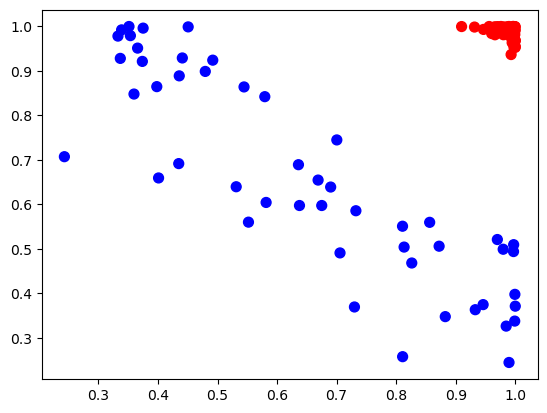

In [33]:
X_new=np.exp(-(X**2))
plt.scatter(X_new[:, 0], X_new[:, 1], c=y, s=50, cmap='bwr')